In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Data Exploration

In this section, I will be taking steps to explore the data and see what I am working with. I look for null values, value counts of specific values, and column names.

In [79]:
house= pd.read_csv('../../../data/kc_house_data.csv')
#reading the data file into the learn-env

In [80]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [65]:
house.isnull().sum().value_counts(normalize= True)

0       0.857143
3842    0.047619
2376    0.047619
63      0.047619
dtype: float64

In [4]:
house.columns.to_list()
#printing columns into a list for easier readability 

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [66]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
id,0,0.000000
sqft_above,0,0.000000


In [6]:
house.dtypes
#seeing what types of data we are working with

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Cleaning

In this part of the notebook, I am focusing on getting the data cleaned and easier to manipulate so that we can get a baseline model and feature engineer to create more models.

In [93]:
#Getting rid of the question marks in the sqft_basement so that I can make a new column turning those values into booleans
house['sqft_basement'] = pd.to_numeric(house.sqft_basement, errors='coerce')

In [94]:
#Any values in the column sqft_basement greater than zero are set to True in the new column and those with 0 are set to false.
house['basement'] = house['sqft_basement'] > 0

In [95]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Sammamish_y,SeaTac_y,Seattle_y,Shoreline_y,Snoqualmie_y,Tukwila_y,Union Hill-Novelty Hill_y,Vashon_y,White Center_y,Woodinville_y
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
house.sqft_basement = house.sqft_basement.replace('?','0')

In [111]:
house.waterfront = house.waterfront.astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [86]:
house['sqft_basement']= house['sqft_basement'].astype(float)
house['sqft_basement']= house['sqft_basement'].apply(lambda x: '1' if x>=1 else 0)

This function grabs the zipcodes and returns the city associated with those zipcodes so that we can group them to make more sense of them.

In [97]:
house['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [98]:
def getcity(zipcode):
    if (zipcode == 98002) or (zipcode == 98092):
        return 'Auburn'
    elif(zipcode == 98224):
        return 'Baring'
    elif(zipcode == 98004) or (zipcode == 98005) or (zipcode == 98006) or (zipcode == 98007) or (zipcode == 98008):
        return 'Bellevue'
    elif(zipcode == 98010):
        return 'Black Diamond'
    elif(zipcode == 98011):
        return 'Bothell'
    elif(zipcode == 98178):
        return 'Bryn Mawr-Skyway'
    elif(zipcode == 98148) or (zipcode == 98166):
        return 'Burien'
    elif(zipcode == 98014):
        return 'Carnation'
    elif(zipcode == 98077):
        return 'Cottage Lake'
    elif(zipcode == 98042):
        return 'Covington'
    elif(zipcode == 98198):
        return 'Des Moines'
    elif(zipcode == 98019):
        return 'Duvall'
    elif(zipcode == 98031):
        return 'East Hill-Meridian'
    elif(zipcode == 98022):
        return 'Enumclaw'
    elif(zipcode == 98058):
        return 'Fairwood'
    elif(zipcode ==98024):
        return 'Fall city'
    elif(zipcode == 98003) or (zipcode == 98023):
        return 'Federal Way'
    elif(zipcode == 98027) or (zipcode == 98029):
        return 'Issaquah'
    elif(zipcode == 98028):
        return 'Kenmore'
    elif(zipcode == 98032) or (zipcode == 98030):
        return 'Kent'
    elif(zipcode == 98033) or (zipcode == 98034):
        return 'Kirkland'
    elif (zipcode == 98001):
        return 'Lakeland North'
    elif(zipcode == 98038):
        return 'Maple Valley'
    elif(zipcode == 98039):
        return 'Medina'
    elif(zipcode == 98040):
        return 'Mercer Island'
    elif(zipcode == 98045):
        return 'North Bend'
    elif(zipcode == 98047):
        return 'Pacific'
    elif(zipcode == 98050):
        return 'Preston'
    elif(zipcode == 98051):
        return 'Ravensdale'
    elif(zipcode == 98052):
        return 'Redmond'
    elif(zipcode == 98055) or (zipcode == 98056) or(zipcode == 98057) or (zipcode == 98059):
        return 'Renton'
    elif(zipcode == 98074) or (zipcode == 98075):
        return 'Sammamish'
    elif (zipcode == 98188):
        return 'SeaTac'
    elif (zipcode == 98155) or (zipcode == 98177):
        return 'Shoreline'
    elif (zipcode == 98288):
        return 'Skykomish'
    elif (zipcode == 98065):
        return 'Snoqualmie'
    elif (zipcode == 98168):
        return 'Tukwila'
    elif (zipcode == 98053):
        return 'Union Hill-Novelty Hill'
    elif (zipcode == 98195):
        return 'Univ Of Washington'
    elif (zipcode == 98070):
        return 'Vashon'
    elif (zipcode == 98146):
        return 'White Center'
    elif (zipcode == 98072):
        return 'Woodinville'
    else:
        return 'Seattle'
city = house.zipcode.apply(getcity)
house['city'] = city
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Sammamish_y,SeaTac_y,Seattle_y,Shoreline_y,Snoqualmie_y,Tukwila_y,Union Hill-Novelty Hill_y,Vashon_y,White Center_y,Woodinville_y
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
house['city'].value_counts()

Seattle                    6726
Bellevue                   1407
Renton                     1142
Kirkland                    977
Sammamish                   800
Federal Way                 779
Issaquah                    733
Shoreline                   701
Maple Valley                589
Redmond                     574
Auburn                      550
Covington                   547
Fairwood                    455
Union Hill-Novelty Hill     403
Kent                        381
Lakeland North              361
Burien                      311
Snoqualmie                  308
White Center                288
Kenmore                     283
Mercer Island               282
Des Moines                  280
East Hill-Meridian          273
Woodinville                 273
Tukwila                     269
Bryn Mawr-Skyway            262
Enumclaw                    233
North Bend                  220
Cottage Lake                198
Bothell                     195
Duvall                      190
SeaTac  

In this step, we are turning 

In [99]:
dummy = pd.get_dummies(house['city'])
dummy

,Auburn,Bellevue,Black Diamond,Bothell,Bryn Mawr-Skyway,Burien,Carnation,Cottage Lake,Covington,Des Moines,...,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Union Hill-Novelty Hill,Vashon,White Center,Woodinville
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
house = pd.concat([house, dummy], axis=1)
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Union Hill-Novelty Hill,Vashon,White Center,Woodinville
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [101]:
house = house.merge(dummy, left_index=True, right_index=True)
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Sammamish_y,SeaTac_y,Seattle_y,Shoreline_y,Snoqualmie_y,Tukwila_y,Union Hill-Novelty Hill_y,Vashon_y,White Center_y,Woodinville_y
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
houses = pd.get_dummies(house['bathrooms'])
houses

,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,...,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.50,7.75,8.00
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21594,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
house = pd.concat([house, houses], axis=1)
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.5,7.75,8.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
house = house.drop('zipcode', 1)
#house= house.drop('city', 1)
house = house.drop('date', 1)

In [105]:
house.corr().sort_values('price')
#Since we are using price as our independent variable, I am looking to see what the highest correlated columns are

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.5,7.75,8.0
1.0,-0.020245,-0.245023,-0.370650,-0.675967,-0.456152,-0.041332,-0.330005,-0.024953,-0.084961,0.032683,...,-0.011433,-0.010026,-0.006340,-0.007766,-0.004483,-0.004483,-0.004483,-0.003170,-0.003170,-0.004483
Federal Way_y,0.041704,-0.132120,0.005704,-0.014928,-0.023696,-0.021401,-0.062763,-0.007450,-0.020267,-0.008495,...,-0.004747,-0.004163,-0.002633,-0.003225,-0.001862,-0.001862,-0.001862,-0.001316,-0.001316,-0.001862
Federal Way_y,0.041704,-0.132120,0.005704,-0.014928,-0.023696,-0.021401,-0.062763,-0.007450,-0.020267,-0.008495,...,-0.004747,-0.004163,-0.002633,-0.003225,-0.001862,-0.001862,-0.001862,-0.001316,-0.001316,-0.001862
Federal Way_x,0.041704,-0.132120,0.005704,-0.014928,-0.023696,-0.021401,-0.062763,-0.007450,-0.020267,-0.008495,...,-0.004747,-0.004163,-0.002633,-0.003225,-0.001862,-0.001862,-0.001862,-0.001316,-0.001316,-0.001862
Federal Way_x,0.041704,-0.132120,0.005704,-0.014928,-0.023696,-0.021401,-0.062763,-0.007450,-0.020267,-0.008495,...,-0.004747,-0.004163,-0.002633,-0.003225,-0.001862,-0.001862,-0.001862,-0.001316,-0.001316,-0.001862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sqft_living15,-0.002701,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.088860,0.279561,-0.093072,...,0.042012,0.052625,0.017199,0.041481,0.030384,0.003769,0.014794,-0.005349,0.025357,0.033825
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.075463,0.166299,-0.158904,...,0.073685,0.094268,0.064233,0.064441,0.061404,0.044662,0.036756,0.018591,0.058133,0.083726
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,...,0.053822,0.070487,0.041673,0.052226,0.035618,0.031517,0.031517,-0.003816,0.030986,0.039720
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,...,0.078479,0.103753,0.072378,0.079221,0.065668,0.049106,0.067922,0.014599,0.057885,0.112314


In [106]:
house_features = [ 'sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'sqft_lot', 'sqft_above','sqft_living15', 'sqft_lot15' ] 

# Baseline Model

In [107]:
house_features = [ 'sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'sqft_lot', 'sqft_above','sqft_living15', 'sqft_lot15' ]
X= house[house_features]
y= house.price

In [108]:
X.describe()
#gives the specifics of each column that we are looking at

,sqft_living,grade,bedrooms,lat,waterfront,view,floors,long,yr_renovated,condition,yr_built,sqft_lot,sqft_above,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,2080.321850,7.657915,3.373200,47.560093,0.007596,0.233863,1.494096,-122.213982,83.636778,3.409825,1970.999676,1.509941e+04,1788.596842,1986.620318,12758.283512
std,918.106125,1.173200,0.926299,0.138552,0.086825,0.765686,0.539683,0.140724,399.946414,0.650546,29.375234,4.141264e+04,827.759761,685.230472,27274.441950
min,370.000000,3.000000,1.000000,47.155900,0.000000,0.000000,1.000000,-122.519000,0.000000,1.000000,1900.000000,5.200000e+02,370.000000,399.000000,651.000000
25%,1430.000000,7.000000,3.000000,47.471100,0.000000,0.000000,1.000000,-122.328000,0.000000,3.000000,1951.000000,5.040000e+03,1190.000000,1490.000000,5100.000000
50%,1910.000000,7.000000,3.000000,47.571800,0.000000,0.000000,1.500000,-122.231000,0.000000,3.000000,1975.000000,7.618000e+03,1560.000000,1840.000000,7620.000000
75%,2550.000000,8.000000,4.000000,47.678000,0.000000,0.000000,2.000000,-122.125000,0.000000,4.000000,1997.000000,1.068500e+04,2210.000000,2360.000000,10083.000000
max,13540.000000,13.000000,33.000000,47.777600,1.000000,4.000000,3.500000,-121.315000,2015.000000,5.000000,2015.000000,1.651359e+06,9410.000000,6210.000000,871200.000000


In [117]:
house['waterfront'].fillna(0.0, inplace = True)
house['view'].fillna(0.0, inplace = True)
house['yr_renovated'].fillna(0.0, inplace = True)
house['sqft_basement'].fillna(house['sqft_basement'].mean, inplace= True)
print(house.isnull().sum())

#changing null values to the mean to see the difference in the correlation

id           0
date         0
price        0
bedrooms     0
bathrooms    0
            ..
6.5          0
6.75         0
7.5          0
7.75         0
8.0          0
Length: 200, dtype: int64


C:\Users\kamry\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [110]:
#split train test and linear regression
reg= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
#gives us a 68% accuracy

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [29]:
#bin zipcodes into towns (reduced dimensions)
#encode (one-hind code)
#create booleans for basement

In [30]:
model_1_train = X_train[['sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'sqft_lot']]
model_1_test= X_test[['sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'sqft_lot']]
model1= LinearRegression()
model1.fit(model_1_train, y_train)

train_preds = model1.predict(model_1_train)
test_preds = model1.predict(model_1_test)

train_error= mean_squared_error(y_train, train_preds)
test_error= mean_squared_error(y_test, test_preds)

print('Train error:', train_error)
print('Test error:', test_error)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

This is our baseline error which gives us a target to beat for our other models.

Text(0.5, 1.0, 'Square Feet')

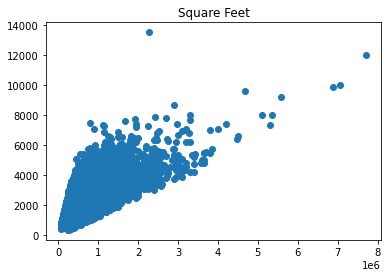

In [31]:
plt.scatter(house.price, house.sqft_living)
plt.title('Square Feet')

Text(0.5, 1.0, 'Location and Price')

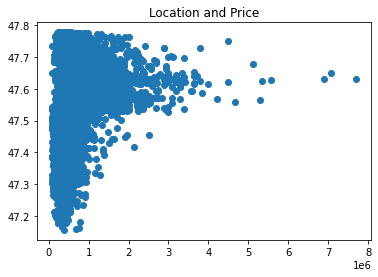

In [32]:
plt.scatter(house.price, house.lat)
plt.title('Location and Price')

C:\Users\kamry\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 936x936 with 0 Axes>

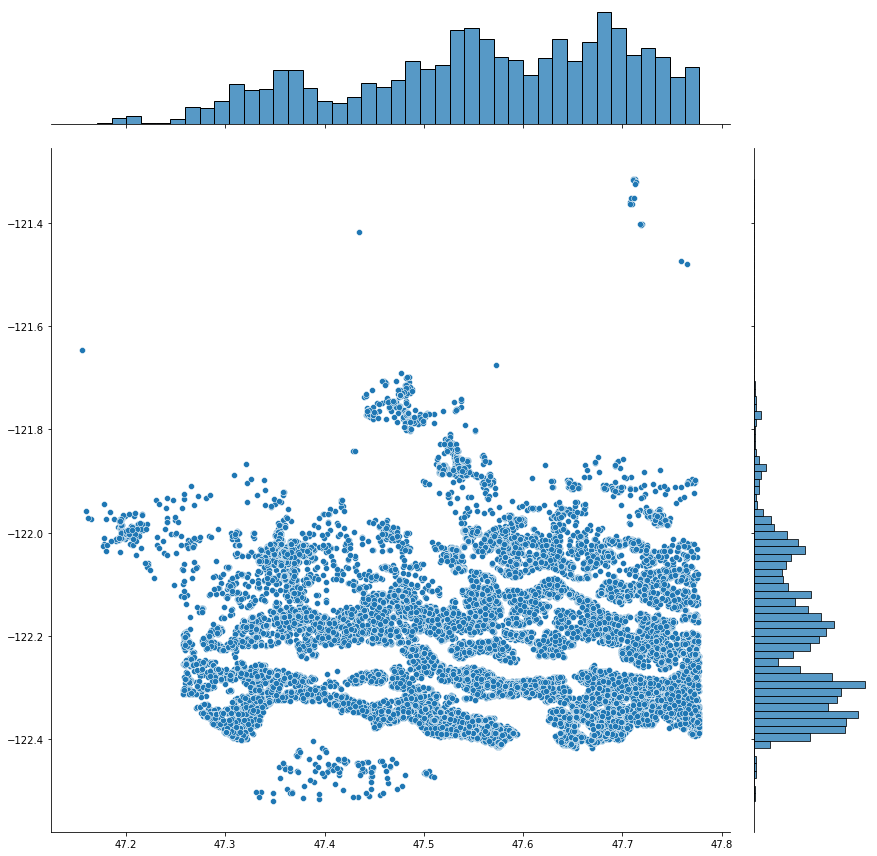

In [33]:
#shows us where the most houses are located in the dataset
plt.figure(figsize=(13,13))
sns.jointplot(x=house.lat.values, y= house.long.values, size= 12)
plt.xlabel= ('Longitude')
plt.ylabel= ('Latitude')
plt.show()

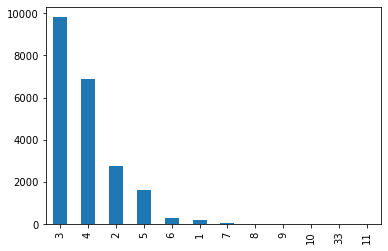

In [34]:
#seeing how many bedrooms most houses have since my mean code isn't working
house['bedrooms'].value_counts().plot(kind='bar')
plt.title = ('# of Bedrooms')
plt.xlabel= ('Bedrooms')
plt.ylabel= ('Count')

# Secondary Models

In this model I am getting rid of outliers that are not within 2 standard deviations away from the mean to see how it effects the score of my model.

C:\Users\kamry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


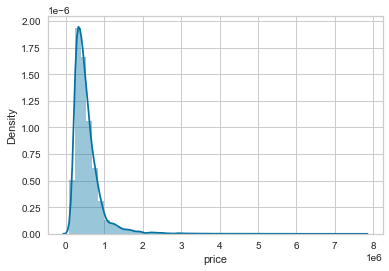

In [112]:
sns.distplot(house['price']);

In [113]:
house=house[(np.abs(stats.zscore(house['price'])) <2)]
house= house[(np.abs(stats.zscore(house['price']))> -2)]
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.5,7.75,8.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\kamry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


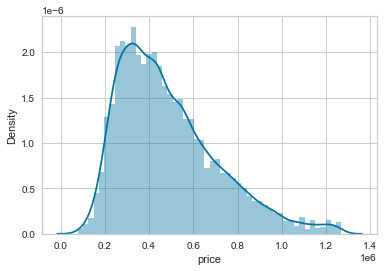

In [114]:
sns.distplot(house['price']);

In [115]:
house_features = [ 'sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'sqft_lot', 'sqft_above','sqft_living15', 'sqft_lot15' ]
X= house[house_features]
y= house.price

In [116]:
reg= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError


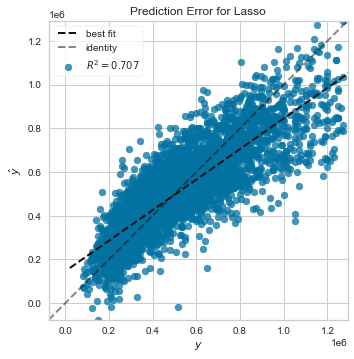

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [41]:
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()               

Getting rid of outliers increased our R2 scored by about .02 which is a good start. The next step below will be calculating the train and test error.

In [42]:
model_2_train = X_train[['sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'sqft_lot']]
model_2_test= X_test[['sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'sqft_lot']]
model2= LinearRegression()
model2.fit(model_2_train, y_train)

train_preds = model2.predict(model_2_train)
test_preds = model2.predict(model_2_test)

train_error= np.sqrt(mean_squared_error(y_train, train_preds))
test_error= np.sqrt(mean_squared_error(y_test, test_preds))

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 123639.50793403793
Test error: 125528.57156698598


The train and test erros are significantly lower and smaller in difference than the baseline model!

## Model 3

In [43]:
#based this model on the top 5 correlated columns in the df
house_corr = ['sqft_living15', 'sqft_living', 'sqft_above', 'yr_built', 'view']
X= house[house_corr]
y= house.price

In [44]:
reg= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
#Score of .56 was much worse than the baseline model

0.49381986599905014

In [45]:
model_3_train = X_train[['sqft_living15', 'sqft_living', 'sqft_above', 'yr_built', 'view']]
model_3_test= X_test[['sqft_living15', 'sqft_living', 'sqft_above', 'yr_built', 'view']]
model3= LinearRegression()
model3.fit(model_3_train, y_train)

train_preds = model3.predict(model_3_train)
test_preds = model3.predict(model_3_test)

train_error= np.sqrt(mean_squared_error(y_train, train_preds))
test_error= np.sqrt(mean_squared_error(y_test, test_preds))

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 160530.51747257172
Test error: 162091.1587847199


This model gave us an even lower R2 than the baseline but there is still a smaller error which is a good quality

# Model 4

In this model, I will test what creating another column that tells us whether a house has a basement or not has an impact on our model's accuracy.

In [46]:
with_basement= ['sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'basement']
X= house[with_basement]
y= house.price

In [47]:
reg= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6960529660282476

In [48]:
model_4_train = X_train[['sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'basement']]
model_4_test= X_test[['sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'basement']]
model4= LinearRegression()
model4.fit(model_4_train, y_train)

train_preds = model4.predict(model_4_train)
test_preds = model4.predict(model_4_test)

train_error= np.sqrt(mean_squared_error(y_train, train_preds))
test_error= np.sqrt(mean_squared_error(y_test, test_preds))

print('Train error:', train_error)
print('Test error:', test_error)

Train error: 123675.51331755577
Test error: 125604.65462472502


This model has a tad higher R2 than the previous model, but it is still lower than model 2. The train and test errors stayed constant as well.

In [57]:
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()

NameError: name 'Y' is not defined

## Model 5

In [50]:
house['log_price'] = np.log(house['price'])

In [51]:
log_with_basement= ['sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built']
X= house[log_with_basement]
y= house['log_price']

In [52]:
reg= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7092607400374449

In [53]:
mlr_split = LinearRegression()

#fit
mlr_split.fit(X_train, y_train)

# calculate predictions on training and test sets
y_hat_train = mlr_split.predict(X_train)
y_hat_test = mlr_split.predict(X_test)

#compare MSE for the predicted training and test values 
train_mse = mean_squared_error(np.exp(y_train), np.log(y_hat_train))
test_mse = mean_squared_error(np.exp(y_test), y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

print('Train score:', mlr_split.score(X_train, y_train))
print('Test score:', mlr_split.score(X_test, y_test))

Train Mean Squarred Error: 285873410874.5022
Test Mean Squarred Error: 295375959829.9227
Train score: 0.7061598296934175
Test score: 0.7092607400374449


## Cross Validation 

In [54]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [55]:
X

,sqft_living,grade,bedrooms,lat,waterfront,view,floors,long,yr_renovated,condition,yr_built
0,1180,7,3,47.5112,0.0,0.0,1.0,-122.257,0.0,3,1955
1,2570,7,3,47.7210,0.0,0.0,2.0,-122.319,1991.0,3,1951
2,770,6,2,47.7379,0.0,0.0,1.0,-122.233,0.0,3,1933
3,1960,7,4,47.5208,0.0,0.0,1.0,-122.393,0.0,5,1965
4,1680,8,3,47.6168,0.0,0.0,1.0,-122.045,0.0,3,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,8,3,47.6993,0.0,0.0,3.0,-122.346,0.0,3,2009
21593,2310,8,4,47.5107,0.0,0.0,2.0,-122.362,0.0,3,2014
21594,1020,7,2,47.5944,0.0,0.0,2.0,-122.299,0.0,3,2009
21595,1600,8,3,47.5345,0.0,0.0,2.0,-122.069,0.0,3,2004


In [56]:
from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None )
model = LogisticRegression()

model.fit(X,y)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores
# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = X[train_index], X[test_index] 
#       y_train, y_test = y[train_index], y[test_index]
        

ValueError: Unknown label type: 'continuous'

In [ ]:
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()